### Option Greeks

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('classic')

def BS_call(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Call = S * stats.norm.cdf(d1,0.0,1.0) - K * np.exp(-r*t) * stats.norm.cdf(d2,0.0,1.0)
    return Call

# delta : to St 
def BS_call_delta(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    Val = stats.norm.cdf(d1,0.0,1.0)
    return Val

def BS_put_delta(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    Val = -stats.norm.cdf(-d1,0.0,1.0)
    return Val

# gamma : to St^2 
def BS_gamma(S, K, r, t, Sigma):  # Call = put 
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    Val = stats.norm.pdf(d1,0.0,1.0)/(Sigma * S * np.sqrt(t))   # notice here is pdf 
    return Val

# vega : to sigma 
def BS_vega(S, K, r, t, Sigma):  # Call = put 
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    Val = S * stats.norm.pdf(d1,0.0,1.0) * np.sqrt(t)
    return Val 

# Rho : to r 
def BS_call_rho(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Val = t * np.exp ( -r * t) * K * stats.norm.cdf(d2,0.0,1.0)
    return Val     
    
def BS_put_rho(S, K, r, t, Sigma):
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Val = -t *  np.exp(-r * t) * K * stats.norm.cdf(-d2, 0.0, 1.0)
    return Val


# Theta : to t 
def BS_call_Theta(S, K, r, t, Sigma):    
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t)/(Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    Val_call  = -(S * stats.norm.pdf(d1, 0.0, 1.0) * Sigma) / (2 * np.sqrt(t)) - r * K * np.exp( -r * t) * stats.norm.cdf(d2,0.0,1.0)
    return Val_call
    
def BS_put_Theta(S, K, r, t, Sigma):    
    d1 = (np.log(S/K) + (r + 0.5 * Sigma**2)*t) / (Sigma * np.sqrt(t))
    d2 = d1 - Sigma * np.sqrt(t)
    
    # First term: Time decay
    first_term = -(S * stats.norm.pdf(d1, 0.0, 1.0) * Sigma) / (2 * np.sqrt(t))
    
    # Second term: Discounted strike
    second_term = r * K * np.exp(-r * t) * stats.norm.cdf(-d2, 0.0, 1.0)
    
    # Combine terms
    Val_put = first_term + second_term
    return Val_put


### Delta 

In [6]:
# given value 
S = 2
K = 10
r = 0.05
t = 1
Sigma = 0.5


print('BS Call price:')
print(round(BS_call(S, K, r, t, Sigma),3))
print('BS Call Delta:')
print(round(BS_call_delta(S, K, r, t, Sigma),3))



BS Call price:
0.001
BS Call Delta:
0.002


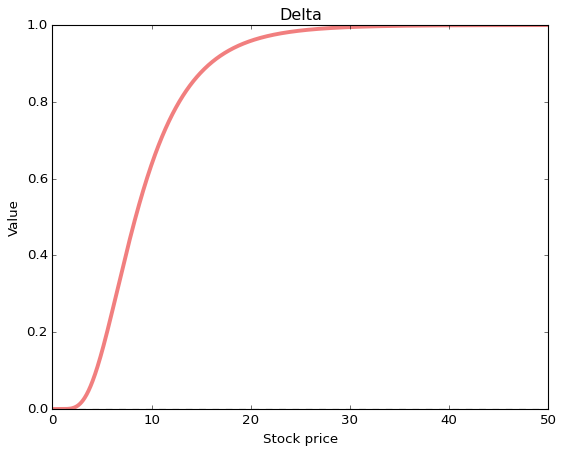

In [7]:
# call delta 

S = np.linspace(0.0001, 50, 1000, endpoint=True)
# Creates 1000 evenly spaced points from near 0 to 2×S0
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Delta')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, BS_call_delta(S, K, r, t, Sigma), color='xkcd:red', alpha=0.5, linewidth=3.5)
plt.show()

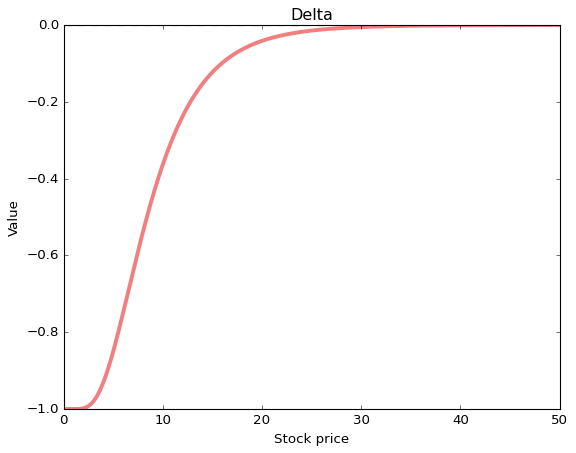

In [10]:
# put_delta 

S = np.linspace(0.0001, 50, 1000, endpoint=True)
# Creates 1000 evenly spaced points from near 0 to 2×S0
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Delta')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, BS_put_delta(S, K, r, t, Sigma), color='xkcd:red', alpha=0.5, linewidth=3.5)
plt.show()


# from out of money ( underlying stock with high price) to deep in the money, the delta became -1 

### Note 
This graph shows the Delta of a call option plotted against the stock price. Let me explain what it means:

1. Delta represents how much the option price changes when the stock price changes by $1. It's essentially the rate of change or sensitivity of the option price to stock price changes.

2. In this specific case:
- Initial stock price (S) = 2
- Strike price (K) = 10
- Risk-free rate (r) = 0.05 (5%)
- Time to expiration (t) = 1 year
- Volatility (Sigma) = 0.5 (50%)

3. The shape of the curve tells us important things:
- Delta starts near 0 when the stock price is low (deep out-of-the-money)
- As stock price increases, Delta increases in an S-shaped curve
- Delta approaches 1 when the stock price gets very high (deep in-the-money)



### Delta Hedging 

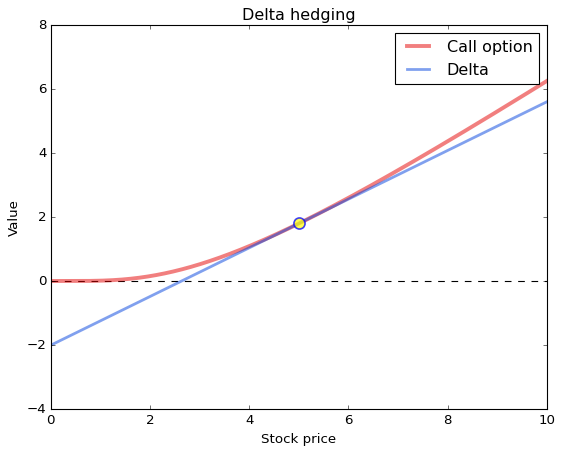

In [11]:
S0 = 5
K = 5
r = 0.05
t = 5
Sigma = 0.3

Call_price = BS_call(S0, K, r, t, Sigma)
Call_delta = BS_call_delta(S0, K, r, t, Sigma)

S = np.linspace(0.0001, S0*2, 1000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Delta hedging')
plt.ylabel('Value')
plt.xlabel('Stock price')

# Add these lines to plot the actual curves:
plt.plot(S, BS_call(S, K, r, t, Sigma), color='xkcd:red', alpha=0.5, linewidth=3.5)
plt.plot(S, Call_price + Call_delta*(S-S0), color='xkcd:blue', alpha=0.5, linewidth=2.5)
plt.plot(S0, Call_price, 'o', color='xkcd:yellow', alpha=0.75, markersize=10, markeredgewidth=1.5, markeredgecolor='b')  # dot : ATM 

# Add legend
plt.legend(['Call option', 'Delta'], loc='best')

# Actually display the plot
plt.show()

### note 
- yellow dot : current price 
- delta : linear approx is accurate only in short range 


### Gamma calculation and visualization

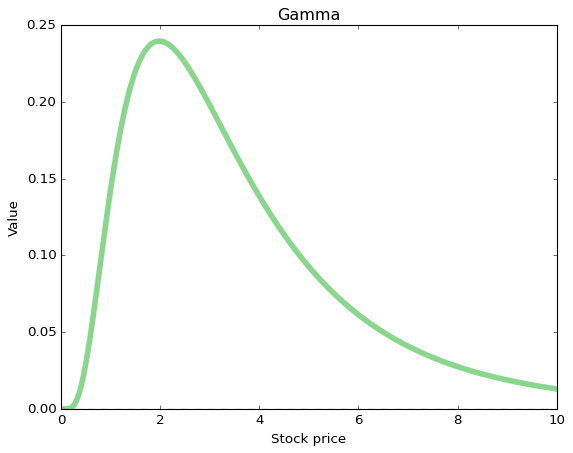

In [20]:
S = 5
K = 5
r = 0.05
t = 5
Sigma = 0.3

Call_price = BS_call(S, K, r, t, Sigma)
Call_gamma = BS_gamma(S, K, r, t, Sigma)

S = np.linspace(0.0001, S*2, 1000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Gamma')
plt.ylabel('Value')
plt.xlabel('Stock price')
plt.plot(S, BS_gamma(S, K, r, t, Sigma), color='xkcd:green', alpha=0.5, linewidth=5)
plt.show()

### note : 
This graph shows the Gamma of a call option across different stock prices. Gamma measures the rate of change of Delta - essentially, it's the second derivative of the option price with respect to the stock price.

Key features of this Gamma plot:

1. Shape characteristics:
- Starts near zero when stock price is very low
- Rises to a peak around stock price = 2 (near the strike price of 5)
- Gradually decreases and approaches zero for higher stock prices


3. What this means in practice:
- Gamma is highest when the option is at-the-money (stock price near strike price)
- This means Delta changes most rapidly near the strike price
- The high Gamma near the strike price explains why delta hedging needs more frequent adjustments when the option is at-the-money
- Low Gamma in deep in-the-money or out-of-the-money regions means Delta changes very slowly there

This visualization helps traders understand where their delta hedges are most sensitive to price changes and where they need to pay most attention to rebalancing their hedges.


### Delta-Gamma hedging:

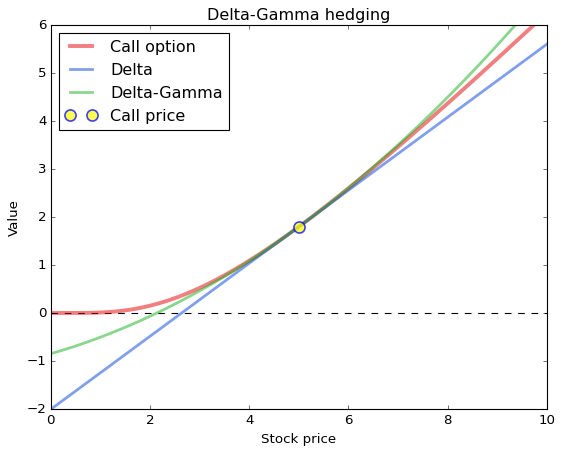

In [21]:
S0 = 5
K = 5
r = 0.05
t = 5
Sigma = 0.3

Call_price = BS_call(S0, K, r, t, Sigma)
Call_delta = BS_call_delta(S0, K, r, t, Sigma)
Call_gamma = BS_gamma(S0, K, r, t, Sigma)

S = np.linspace(0.0001, S0*2, 1000, endpoint=True)
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
plt.axhline(y=0, linestyle='--', color='black', label='_nolegend_')
plt.title('Delta-Gamma hedging')
plt.ylabel('Value')
plt.xlabel('Stock price')

plt.plot(S, BS_call(S, K, r, t, Sigma), color='xkcd:red', alpha=0.5, linewidth=3.5)
plt.plot(S, Call_price + Call_delta*(S-S0), color='xkcd:blue', alpha=0.5, linewidth=2.5)
plt.plot(S, Call_price + Call_delta*(S-S0) + 0.5*Call_gamma*((S-S0)**2), color='xkcd:green', alpha=0.5, linewidth=2.5)
plt.plot(S0, Call_price, 'o', color='xkcd:yellow', alpha=0.75, markersize=10, markeredgewidth=1.5, markeredgecolor='b')
plt.xlim(0,10)
plt.ylim(-2,6)
plt.legend(['Call option', 'Delta', 'Delta-Gamma', 'Call price'], loc='best')
plt.show()

### note : 
This graph shows the comparison between different hedging approaches for a call option:

1. Red line (Call option): Shows the actual call option value
2. Blue line (Delta): Shows the first-order (linear) approximation using only Delta
3. Green line (Delta-Gamma): Shows the second-order approximation using both Delta and Gamma
4. Yellow dot: Shows the current stock price (S0 = 5) and its option value

Key insights:

1. Accuracy of Approximations:
- Near the current price (yellow dot), all three lines meet
- As we move away from current price:
  * Delta (blue line) becomes less accurate due to its linear nature
  * Delta-Gamma (green line) follows the actual option value (red line) more closely because it accounts for the curvature

2. Mathematical Representation:
- Delta hedge (blue): Call_price + Call_delta*(S-S0)
- Delta-Gamma hedge (green): Call_price + Call_delta*(S-S0) + 0.5*Call_gamma*(S-S0)²

3. Practical Implications:
- Delta-Gamma hedging provides better protection against larger price movements
- However, it's more complex and expensive to implement than simple Delta hedging
- The trade-off is between hedging accuracy and implementation cost

This visualization demonstrates why traders might choose Delta-Gamma hedging over simple Delta hedging when they need better protection against large price movements.
